In [4]:
import numpy as np
import pandas as pd
import pipeline
import matplotlib.pyplot as plt
from pydmd import DMD
from jupyterthemes import jtplot ; jtplot.style()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from os import chdir ; chdir('/Users/Alby/Documents/Neuromatch/')
from glob import glob
stim_avg = pd.read_csv('stimulus average for basal ganglia mice', index_col = 0) 

In [2]:
f = glob('*')
basal_ganglia = np.array(["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"])
paths = pipeline.filt(f, regions_to_pull = basal_ganglia)
paths.head(5)

,Origin,abbrev,n_relevant_probes
0,Cori_2016-12-14,Cori_2016-12-14,1.0
1,Moniz_2017-05-16,Moniz_2017-05-16,0.0
2,Muller_2017-01-09,Muller_2017-01-09,0.0
3,Lederberg_2017-12-08,Lederberg_2017-12-08,1.0
4,Richards_2017-11-02,Richards_2017-11-02,0.0


In [7]:
subset = paths[paths.n_relevant_probes >= 2].Origin.values
spikes, stim, neur = pipeline.pipeline(subset)

Getting spike time data ...
Hench_2017-06-18
Mapping neurons from Hench_2017-06-18 to channels ... 
Mapping channels to brain areas ...
Getting behavioral data ...
~~~ OOOoOOOOooOoOOOOOOOOOOoooOooOOOOOOo ~~~
Forming groups ... 
Forming spike trains ...
Forming stimulus series ...
Creating data-frame ...
~~~ the power of christ literally compels you ~~~
Getting spike time data ...
Richards_2017-11-01
Mapping neurons from Richards_2017-11-01 to channels ... 
Mapping channels to brain areas ...
Getting behavioral data ...
~~~ OOOoOOOOooOoOOOOOOOOOOoooOooOOOOOOo ~~~
Forming groups ... 
Forming spike trains ...
Forming stimulus series ...
Creating data-frame ...
~~~ the power of christ literally compels you ~~~
Getting spike time data ...
Lederberg_2017-12-11
Mapping neurons from Lederberg_2017-12-11 to channels ... 
Mapping channels to brain areas ...
Getting behavioral data ...
~~~ OOOoOOOOooOoOOOOOOOOOOoooOooOOOOOOo ~~~
Forming groups ... 
Forming spike trains ...
Forming stimulus series

In [ ]:
stim_avg = pipeline.extract_trial_stim_avg()

drop neuron columns which weren't measured and make a df out of each mouse

In [16]:
maus_1 = stim_avg[stim_avg.maus == 0].dropna(axis = 1).drop('maus', axis = 1).values
maus_2 = stim_avg[stim_avg.maus == 1].dropna(axis = 1).drop('maus', axis = 1).values
maus_3 = stim_avg[stim_avg.maus == 2].dropna(axis = 1).drop('maus', axis = 1).values
maus_4 = stim_avg[stim_avg.maus == 3].dropna(axis = 1).drop('maus', axis = 1).values
stim_avg_mice = [maus_1, maus_2, maus_3, maus_4]
maus_1.shape

(529, 3)

In [13]:
stim_avg

,LSc,CP,LSr,maus,SNr,SI,ACB,OT,GPe
0,2.633929,2.193764,3.6,0,NaN,NaN,NaN,NaN,NaN
1,1.875000,2.048998,2.0,0,NaN,NaN,NaN,NaN,NaN
2,0.892857,2.004454,3.2,0,NaN,NaN,NaN,NaN,NaN
3,2.008929,2.416481,3.8,0,NaN,NaN,NaN,NaN,NaN
4,1.383929,1.302895,2.4,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
524,1.160714,1.648107,1.6,0,NaN,NaN,NaN,NaN,NaN
525,1.785714,1.046771,1.6,0,NaN,NaN,NaN,NaN,NaN
526,0.401786,1.291759,0.6,0,NaN,NaN,NaN,NaN,NaN
527,1.026786,2.060134,1.8,0,NaN,NaN,NaN,NaN,NaN


standardize

In [ ]:
for mouse in stim_avg_mice : 
    mouse = StandardScaler().fit_transform(mouse)  
    stim_avg_mice_standardized.append(mouse) 

In [24]:
pca = PCA(n_components = 3)
maus_1_std = StandardScaler().fit_transform(maus_1)  
pca_1 = pca.fit(maus_1_std) 
explained = pca_1.explained_variance_ratio_
loadings = pca_1.components_
transform = pca.fit_transform(maus_1_std) 

In [25]:
loadings

array([[ 0.60443947,  0.57698651,  0.5493082 ],
       [-0.16921468, -0.58080105,  0.79626411],
       [ 0.77847243, -0.57424447, -0.25342449]])

In [82]:
pca_mice = []
explained_var_mice = []
loadings_per_mouse = []
pca = PCA()
for maus in stim_avg_mice_standardized : 
    reduced = pca.fit(maus) 
    explained_var_mice.append(reduced.explained_variance_ratio_) 
    pca_mice.append(pca.fit_transform(maus))
    loadings_per_mouse.append(reduced.components_)

In [75]:
p.explained_variance_ratio_

array([0.58456932, 0.27358485, 0.14184582])

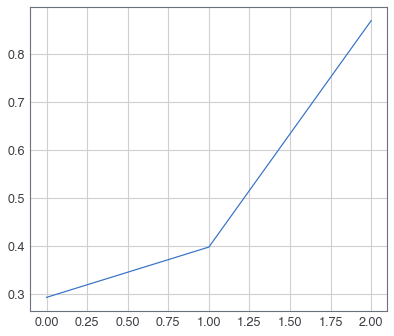

In [77]:
plt.plot(np.arange(3), p.components_[0])

In [78]:
p.components_[0]

array([0.29255833, 0.39744666, 0.86973891])

In [83]:
p.shape

(529, 1)

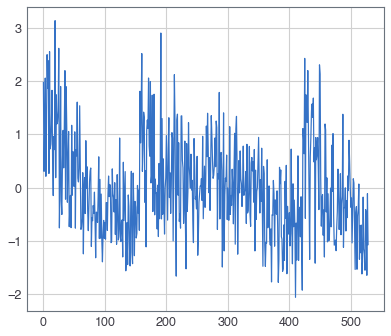

In [84]:
plt.plot(np.arange(529), p)